In [3]:
!pip install pandas numpy matplotlib seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv('./datasets/actual.csv')
df_independent = pd.read_csv('./datasets/data_set_ALL_AML_independent.csv')
df_train = pd.read_csv('./datasets/data_set_ALL_AML_train.csv')


In [6]:
df.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [7]:
df_independent.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [8]:
df_train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [9]:
df_Train = df_train.drop(['Gene Description','Gene Accession Number'], axis=1)

In [10]:
trainreq = [col for col in df_Train.columns if "call" not in col]
train = df_Train[trainreq]
train.head()


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,88,283,309,12,168,71,55,-2,268,219,...,132,318,325,392,241,193,312,230,330,337
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


### Estandarizacion de los datos

In [12]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(train)


### Desarrollo de PCA

In [14]:
explained_variance = []

for n in range(1,38):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))


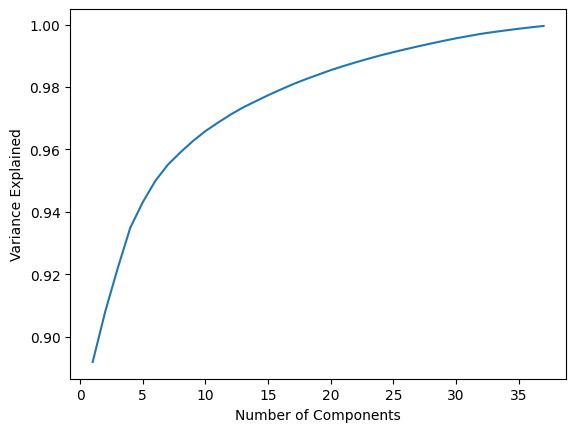

In [15]:
plt.plot(range(1,38),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

### Hacer modelo con n variable

In [21]:
def graficar_pca(scaled_X, n):
    model = PCA(n_components=n)
    principal_components = model.fit_transform(scaled_X)
    
    if n >= 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.title('Dispersión de las primeras dos componentes principales')
        plt.show()
    
    varianza_explicada = model.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n + 1), varianza_explicada * 100, alpha=0.7, color='b')
    plt.xlabel('Componente Principal')
    plt.ylabel('Porcentaje de Varianza Explicada')
    plt.title('Porcentaje de Varianza Explicada por Cada Componente Principal')
    plt.xticks(np.arange(1, n + 1, 1))
    plt.show()


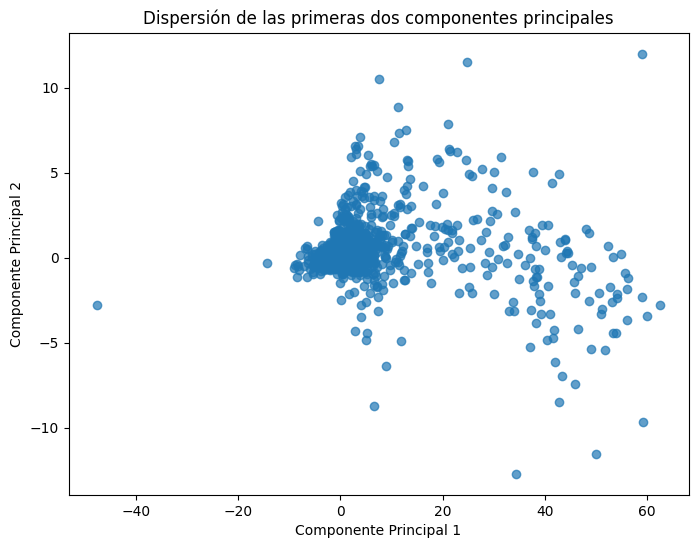

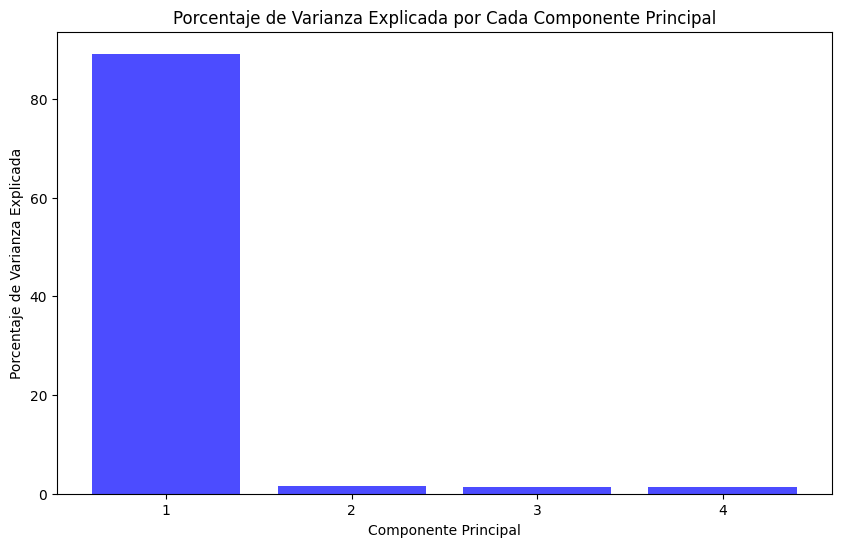

In [22]:
graficar_pca(scaled_X, 4)